In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz
import pydotplus
%matplotlib inline

In [13]:
f = open('balance-scale.txt','r')

X = []
Y = []

for line in f:
    line = np.asarray(line.split(), dtype=np.float32)
    X.append(line[1:])
    Y.append(line[0])
    
X = np.asmatrix(X)
Y = np.reshape(Y, (len(Y), 1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)
clf = clf.fit(X_train, y_train)

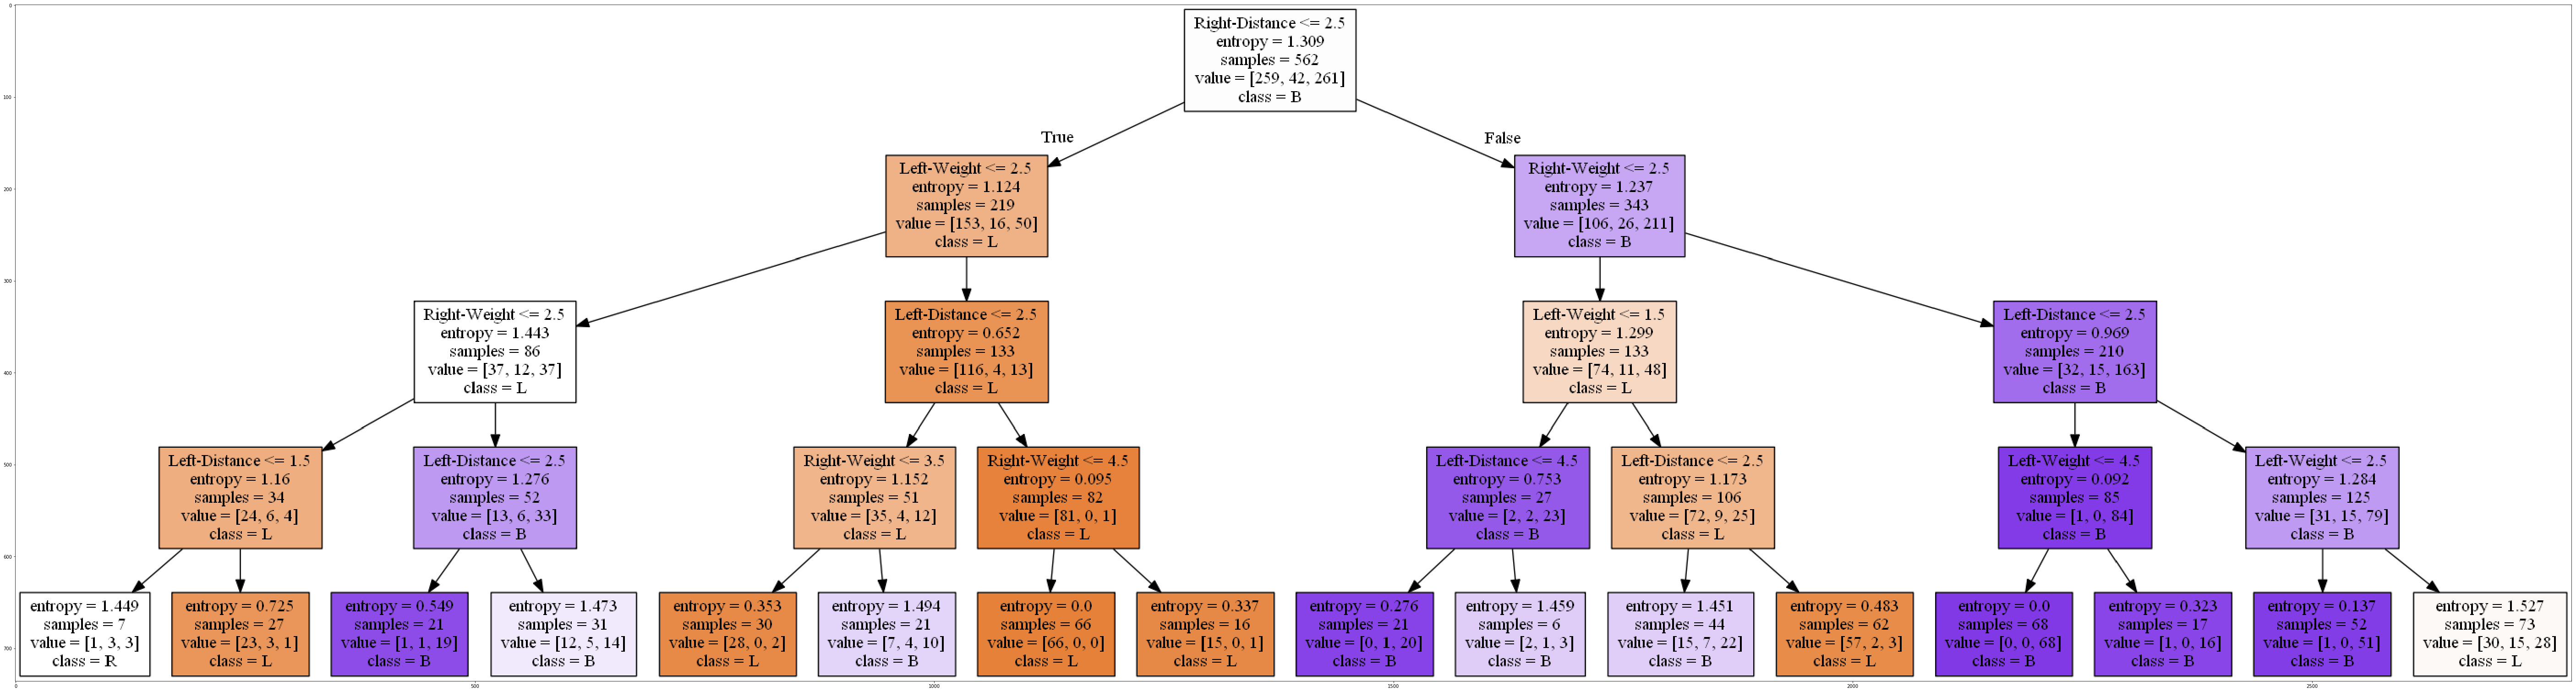

In [14]:
filename = "tree.png"
features = ['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
target = np.asarray(['L', 'R', 'B'])
dot_data = StringIO()
out = tree.export_graphviz(clf,feature_names=features, out_file=dot_data, class_names=target, filled=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

In [15]:
yhat = clf.predict(X_test)

In [16]:
print("DecisionTrees's Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, yhat)))

DecisionTrees's Accuracy: 0.63
